<h1 align= "center" >Diabetes Prediction Analysis</h1>

<h2><i>About Dataset</h2>

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

<h2><i>Importing Libraries</h2>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Pandas: Data analysis and manipulation library for working with structured data using Data Frame and Series.

NumPy: Numerical computing library supporting large, multi-dimensional arrays and matrices, with high-level mathematical functions.

Seaborn: Statistical data visualization library for creating attractive and informative graphics, based on Matplotlib.

Matplotlib: Comprehensive plotting library providing interface for creating various plots like line, scatter, bar, and histograms.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Train Test Split: Technique for splitting data into training and testing sets to assess model performance.

Logistic Regression: Method for predicting the probability of a binary outcome using the logistic function.

Accuracy: Metric measuring the proportion of correctly classified instances in a classification model.

Sklearn: Python's Scikit-learn, a powerful machine learning library providing tools for data analysis and model building.

<h1><i>Loading the Dataset</h1>

In [22]:
data = pd.read_csv("./diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<h1><i> Checking Missing Values</h1>

<Axes: >

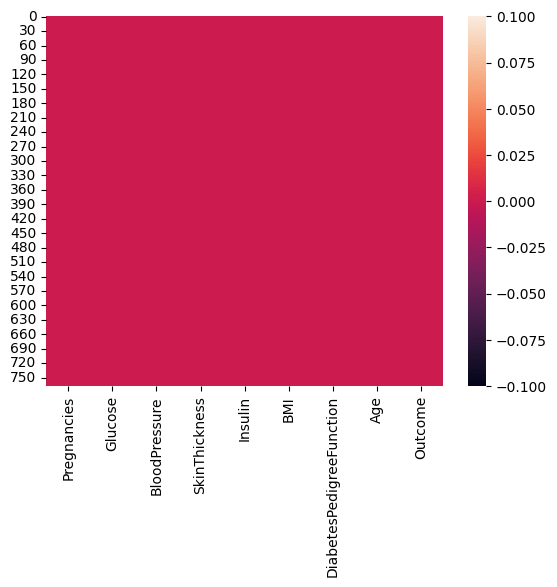

In [23]:
sns.heatmap(data.isnull())

Hence, there is no missing values found in the dataset.

<h1><i>Co relation matrix</h1>

In [24]:
correlation = data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

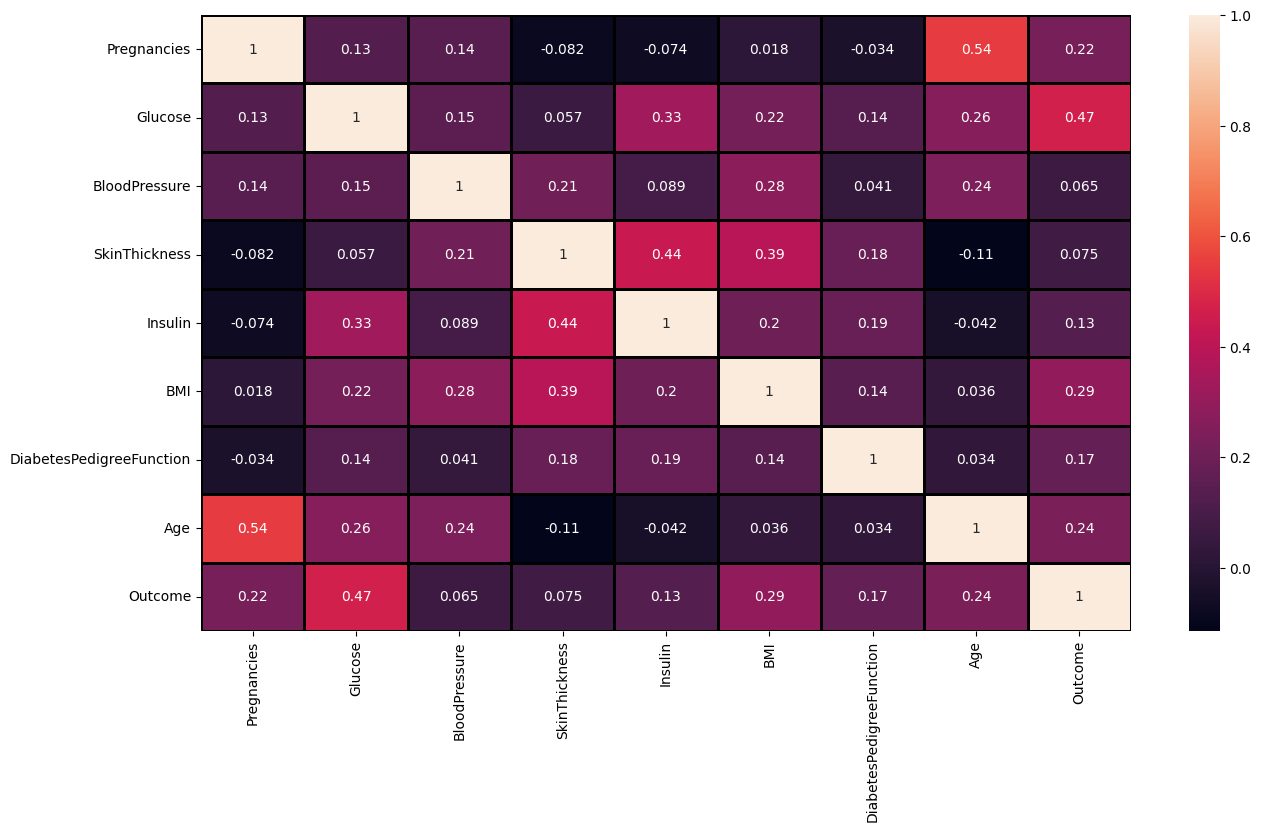

In [25]:
ax= plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),linewidths=1,linecolor='black',annot=True)
plt.show()

Thus we can notice that BMI, Glucose and Age have the most correlation with the Outcome variable.

<h1><i>Train test split</h1>

In [29]:
X = data.drop('Outcome',axis = 1)
Y = data['Outcome']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

Here X contains all the independent variables while Y contains dependemt variable "Outcome". The training-testing technique is a model evaluation technique which determines the performance of the mnodel. Here the datasets X and Y has been divided into 80% training data and 20% testing data.

<h1><i>Training the model</h1>

In [30]:
model = LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\rames\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

<h1><i>Making Prediction</h1>

In [31]:
prediction = model.predict(X_test)

In [32]:
print(prediction)

[0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 1 1 0 1]


After training the model, predictions are made using the test data, which comprises 20% of the total dataset.

In [33]:
accuracy = accuracy_score(prediction,Y_test)

In [34]:
print(accuracy)

0.7337662337662337


<h1><i>Conclusion</h1>

1. Through Exploratory Data Analysis, we have seen that the factors in this dataset which are the most determining in Diabetes are Glucose level, BMI and Age respectively.

2. The Logistic Regression Model has achieved an accuracy of 73.37% which indicates decent performance in predicting Diabetes based on thegiven features. However, there is always room for improvement.